In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import h5py
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/home/kuanweih/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
h = 0.697
omegaM = 0.2814
omegaL = 0.7186
H0 = 100.*h
c_edd = 2.2e-8
maxaccedd = 3.0

In [4]:
data = h5py.File('/home/yfeng1/bluetide/subhalos.hdf5', 'r')['Blackholes'][:]
print sorted(data.dtype.names)

['BlackholeAccretionRate', 'BlackholeMass', 'BlackholeProgenitors', 'GroupID', 'ID', 'Mass', 'Position', 'Potential', 'Velocity', 'time']


In [5]:
def get_history(data, id):
    sel = (data['ID'] == id)
    return data[sel]

In [6]:
mostmassive = [13835058306567671856]  # the most massive bh
# mostmassive = [13835058306567671856, 13835058306567671856, 63094649552, 50084801594, 243995112195] 

In [7]:
details = {}
for massiveid in mostmassive:
    details[massiveid] = get_history(data, massiveid)
    bhacc_mmb = details[massiveid]['BlackholeAccretionRate']*10.2
    a_mmb = details[massiveid]['time']
    z_mmb = 1/a_mmb-1
    eddacc_mmb = details[massiveid]['BlackholeMass']*1e10/h*c_edd

In [8]:
bhmasssall = data['BlackholeMass']*1e10/h
bhaccsall = data['BlackholeAccretionRate']*1e4/980.
bhidsall = data['ID']
timesall = data['time']

In [9]:
unitimes = np.unique(data['time'])
bhmass_tot = np.array([np.mean(bhmasssall[timesall==time]) for time in unitimes])
bhacc_tot = np.array([np.mean(bhaccsall[timesall==time]) for time in unitimes])
eddratio_std = np.array([np.std(bhaccsall[timesall==time]/bhmasssall[timesall==time])/c_edd 
                         for time in unitimes])

In [10]:
eddacc_tot = bhmass_tot*c_edd
eddratio_tot = bhacc_tot/eddacc_tot
z_tot = 1./unitimes-1.

In [11]:
refercolor = 'silver'
gold_color = 'gold'
green_color = 'limegreen'
line_w=3.0
cbfontsize=16
titlefontsize = 18
labelfontsize = 20
ticksize = 16
legsiz = 16    

In [12]:
def basic_fig_set():
    sns.set_style("white")
    sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in"})
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(7, 4, forward=True)

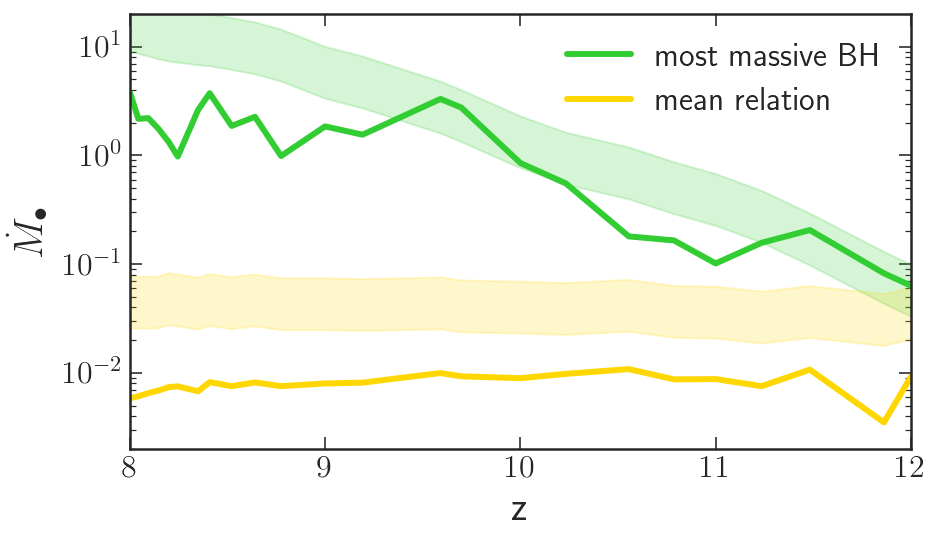

In [13]:
basic_fig_set()

semilogy(z_mmb, bhacc_mmb, color=green_color, lw=line_w, label='most massive BH')  
plt.fill_between( z_mmb, eddacc_mmb, maxaccedd*eddacc_mmb, alpha=0.2, 
                  edgecolor=green_color, facecolor=green_color )

semilogy(z_tot, bhacc_tot, color=gold_color, lw=line_w, label='mean relation')       
plt.fill_between( z_tot, eddacc_tot, maxaccedd*eddacc_tot, 
                alpha=0.2, edgecolor=gold_color, facecolor=gold_color )

plt.xlabel('z', fontsize=labelfontsize)
plt.ylabel(r'$\dot{M}_{\bullet}$', fontsize=labelfontsize)
xticks([8,9,10,11,12],fontsize=ticksize)
yticks([1e-2,1e-1,1e0,1e1],fontsize=ticksize)
plt.ylim([2e-3,2e1])
plt.xlim([8,12])
plt.tick_params( which='both', top='on', right='on')
plt.legend(loc=1, prop={'size':legsiz})

savefig('Edd_z.pdf', bbox_inches='tight', dpi=2000)

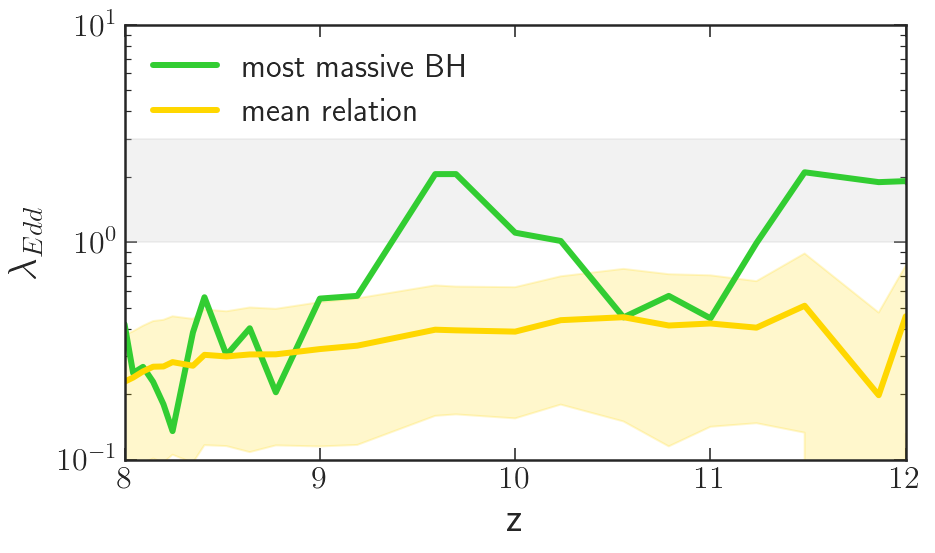

In [14]:
basic_fig_set()

semilogy(z_mmb, bhacc_mmb/eddacc_mmb, color=green_color, lw=line_w, label='most massive BH')  
semilogy(z_tot, bhacc_tot/eddacc_tot, color=gold_color, lw=line_w, label='mean relation')       
plt.fill_between( z_mmb, z_mmb/z_mmb, maxaccedd*z_mmb/z_mmb, alpha=0.2, 
                  edgecolor=refercolor, facecolor=refercolor )
plt.fill_between( z_tot, bhacc_tot/eddacc_tot-eddratio_std, bhacc_tot/eddacc_tot+eddratio_std, 
                  alpha=0.2, edgecolor=gold_color, facecolor=gold_color )

plt.xlabel('z', fontsize=labelfontsize)
plt.ylabel(r'$\lambda_{Edd}$', fontsize=labelfontsize)
xticks([8,9,10,11,12],fontsize=ticksize)
yticks([1e-1,1e0,1e1],fontsize=ticksize)
plt.ylim([1e-1,1e1])
plt.xlim([8,12])
plt.tick_params( which='both', top='on', right='on')
plt.legend(loc=2, prop={'size':legsiz})

savefig('Edd_z.pdf', bbox_inches='tight', dpi=2000)

In [15]:
print mean(bhacc_tot/eddacc_tot)

0.33828875


In [16]:
print bhacc_mmb/eddacc_mmb

[0.6837921  1.9134655  1.8929335  2.1012173  0.99282813 0.44762897
 0.56748354 0.45211437 1.015246   1.1082804  2.0613403  2.060722
 0.56769174 0.55153686 0.20457074 0.40282077 0.30331087 0.5593367
 0.38524267 0.13554561 0.18016589 0.22824903 0.26769036 0.25086537
 0.42050424]


In [17]:
print z_mmb

[12.5049368  12.00000006 11.86152218 11.48224926 11.23563475 11.00000005
 10.78670346 10.55483238 10.23342532 10.          9.6970585   9.59081076
  9.19173028  9.00000002  8.77459267  8.64105252  8.52182855  8.40916146
  8.35008784  8.24577226  8.1992422   8.14643992  8.0946908   8.04374682
  8.00000003]


In [19]:
scalefactors = a_mmb

In [20]:
f = lambda a: 1./np.sqrt(omegaM/a**3.+omegaL)/a/H0

In [21]:
ai = 1e-30
nbin = 10000
realtimes = [np.trapz(f(np.linspace(ai,a,nbin)),np.linspace(ai,a,nbin)) for a in scalefactors]

In [22]:
print(realtimes)

[0.00036324523898661993, 0.00038460475796098893, 0.0003908304414324543, 0.00040877046403371936, 0.0004211852661545172, 0.000433645655439134, 0.00044546381199914555, 0.0004589322376563442, 0.00047875703514203214, 0.0004940671483692086, 0.0005151887029843287, 0.0005229552078281938, 0.0005539460242538997, 0.0005699399661281848, 0.0005897501392922216, 0.0006020340559578979, 0.000613365532701111, 0.0006244041138520281, 0.0006303247758872766, 0.0006410108843808195, 0.0006458751184296355, 0.000651469936572994, 0.0006570319108763535, 0.000662585018687563, 0.0006674162663326121]


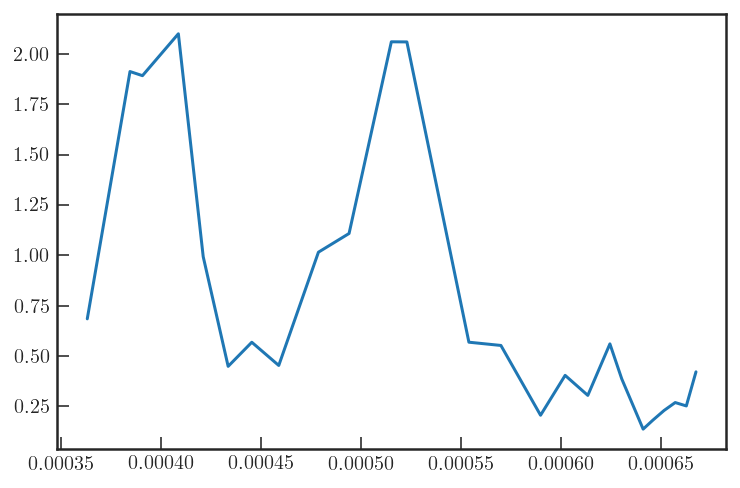

In [23]:
plot(realtimes,bhacc_mmb/eddacc_mmb)

In [24]:
ninterp = 100000
xvals = np.linspace(np.min(realtimes),np.max(realtimes),ninterp)
yvals = np.interp(xvals, realtimes, bhacc_mmb/eddacc_mmb)

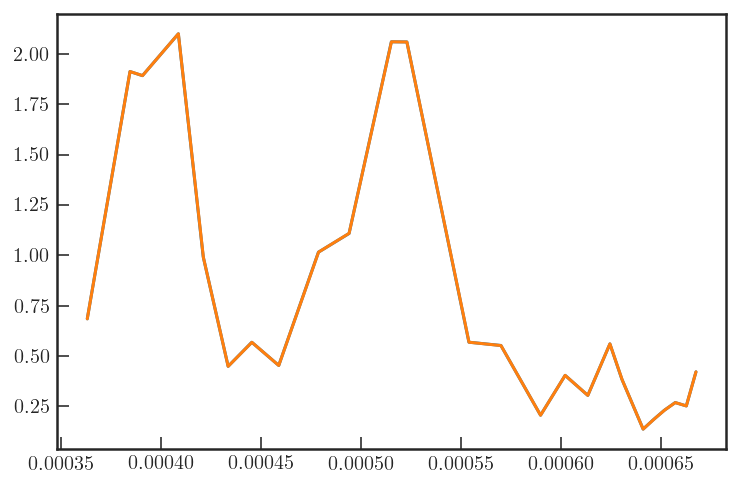

In [25]:
plot(realtimes,bhacc_mmb/eddacc_mmb)
plot(xvals,yvals)

In [26]:
print('%.1f percent of time accreting with lambda>1' %(1e2*np.sum(yvals>1)/ninterp))

39.2 percent of time accreting with lambda>1


In [27]:
print('%.1f percent of time accreting with lambda>2' %(1e2*np.sum(yvals>2)/ninterp))

6.7 percent of time accreting with lambda>2
